<a href="https://colab.research.google.com/github/Shilpagpsc/PCA_Iris/blob/master/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Loading Libraries and Data**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import missingno as msno
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBRFClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,accuracy_score

In [3]:
df=pd.read_csv("/content/drive/MyDrive/data_set 31/churn.csv")
df


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


**Understanding the Data**

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.shape

(7043, 21)

In [6]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

**Data Manipulation**

In [9]:
df.drop(['customerID'],axis=1,inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
#Finding unique values

In [11]:
df['MultipleLines'].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [12]:
df['MultipleLines']=df['MultipleLines'].replace('No phone service','No')
df['MultipleLines'].unique()

array(['No', 'Yes'], dtype=object)

In [13]:
df['OnlineSecurity'].unique()
df['OnlineSecurity']=df['OnlineSecurity'].replace('No internet service','No')

In [14]:
df['OnlineSecurity'].unique()

array(['No', 'Yes'], dtype=object)

In [15]:
df['TechSupport'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [16]:
df['TechSupport']=df['TechSupport'].replace('No internet service','No')

In [17]:
df['StreamingTV']=df['StreamingTV'].replace('No internet service','No')
df['StreamingMovies']=df['StreamingMovies'].replace('No internet service','No')
df['OnlineBackup']=df['OnlineBackup'].replace('No internet service','No')
df['DeviceProtection']=df['DeviceProtection'].replace('No internet service','No')

In [18]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [19]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [20]:
df[np.isnan(df['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No,No,No,No,No,No,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No,No,No,No,No,No,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [21]:
#filling missing values with mean
df['TotalCharges']=df['TotalCharges'].fillna(df["TotalCharges"].mean())
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [22]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [23]:
df.describe(include='all')

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043.000000,7043
unique,2,NaN,2,2,NaN,2,2,3,2,2,2,2,2,2,3,2,4,NaN,NaN,2
top,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,No
freq,3555,NaN,3641,4933,NaN,6361,4072,3096,5024,4614,4621,4999,4336,4311,3875,4171,2365,NaN,NaN,5174
mean,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,2283.300441,NaN
std,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,2265.000258,NaN
min,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,18.800000,NaN
25%,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,402.225000,NaN
50%,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,1400.550000,NaN
75%,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,3786.600000,NaN


**Data Visualization**

In [24]:
#To get Customer Churn count
df['Churn'].value_counts()


No     5174
Yes    1869
Name: Churn, dtype: int64

**Visualize the count of Customer Churn**

<Axes: xlabel='Churn', ylabel='count'>

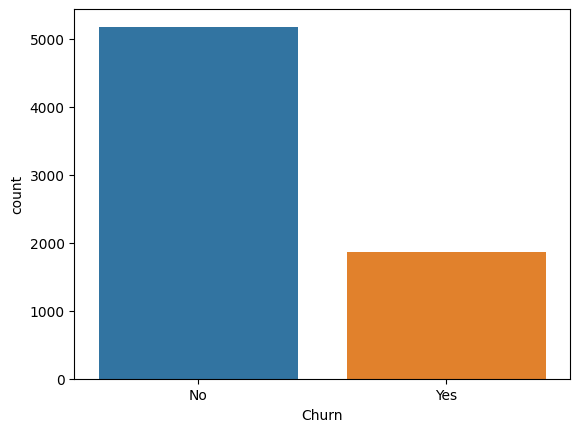

In [25]:
sns.countplot(x='Churn',data=df)

**Visualize the churn count for both males and females**

<Axes: xlabel='gender', ylabel='count'>

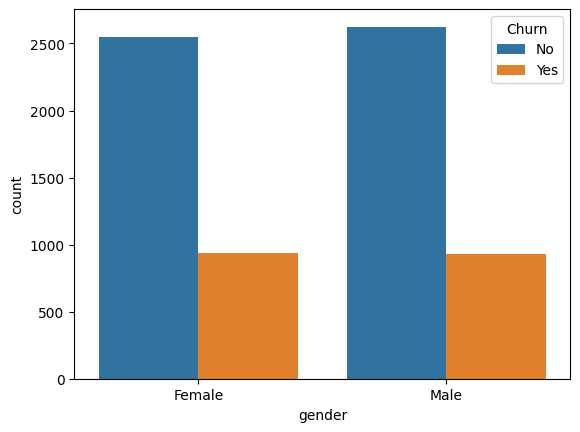

In [26]:
sns.countplot(x='gender',data=df,hue='Churn')

**Visualize the Churn count for InternetService**

<Axes: xlabel='InternetService', ylabel='count'>

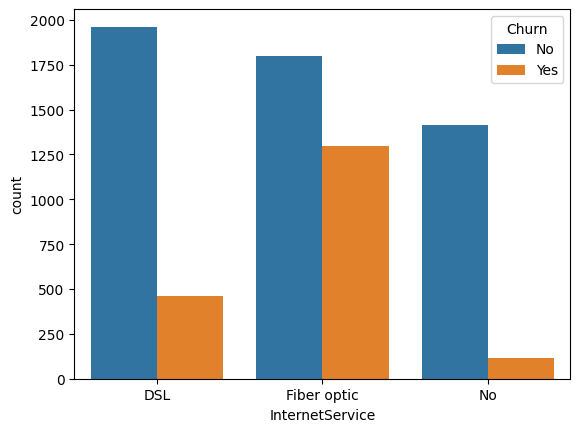

In [27]:
sns.countplot(x='InternetService',data=df,hue='Churn')

In [28]:
#Customers using Fiberoptic are more likely to churn.

**Visualise the churn count with each contract type**

<Axes: xlabel='Contract', ylabel='count'>

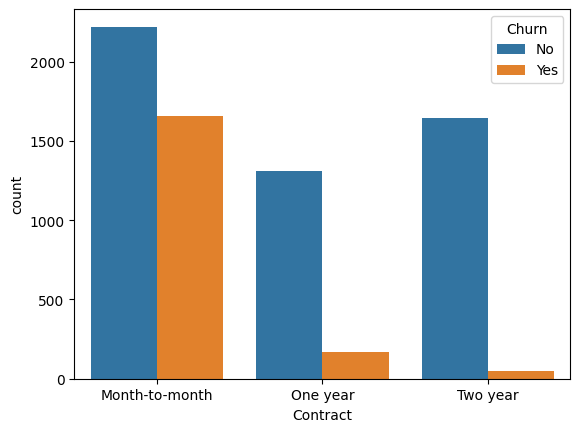

In [29]:
sns.countplot(x='Contract',data=df,hue='Churn')

In [30]:
#Customers with Month-to-Month Contract more likely to move out as compared to  customers with One Year Contract and  Two Year Contract.

**CustomerOnlineSecurity Distribution with respect to Churn**

<Axes: xlabel='Churn', ylabel='count'>

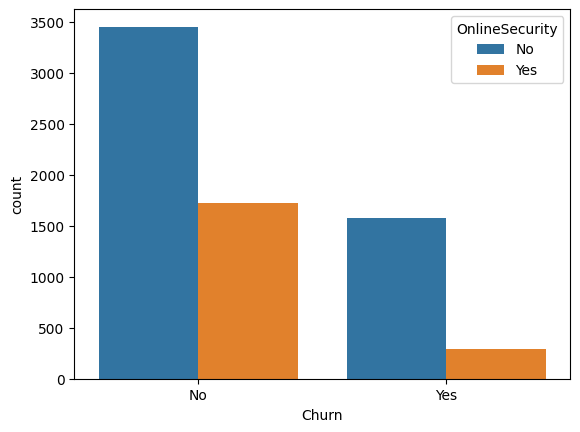

In [31]:
sns.countplot(x="Churn",data=df,hue='OnlineSecurity')

In [32]:
#Most customers churn in the absence of Online Security.

**Churn Distribution with respect to SeniorCitizen**

<Axes: xlabel='Churn', ylabel='count'>

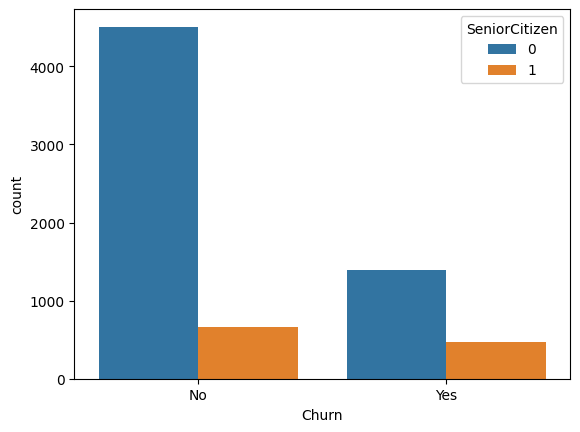

In [33]:
sns.countplot(x='Churn',data=df,hue='SeniorCitizen')


**Churn Distribution with respect to Partner**

<Axes: xlabel='Churn', ylabel='count'>

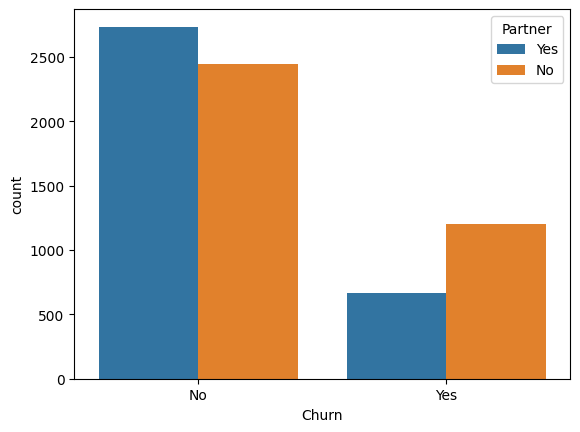

In [34]:
sns.countplot(x='Churn',data=df,hue='Partner')

In [35]:
#Customers doesn't have partner are more likely to churn.

**ChurnDistribution with respect to CustomerPaymentMethod**

<Axes: xlabel='Churn', ylabel='count'>

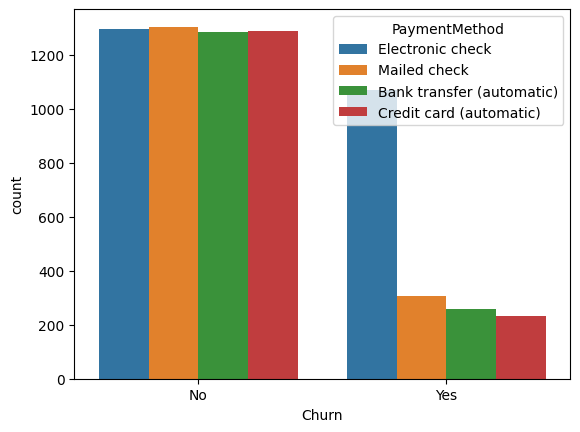

In [36]:
sns.countplot(x='Churn',data=df,hue='PaymentMethod')

In [37]:
 #From the count plot we can understand that Major customers who moved out were having Electronic Check as Payment Method.

**Churn Distribution w.r.t PhoneService**

<Axes: xlabel='Churn', ylabel='count'>

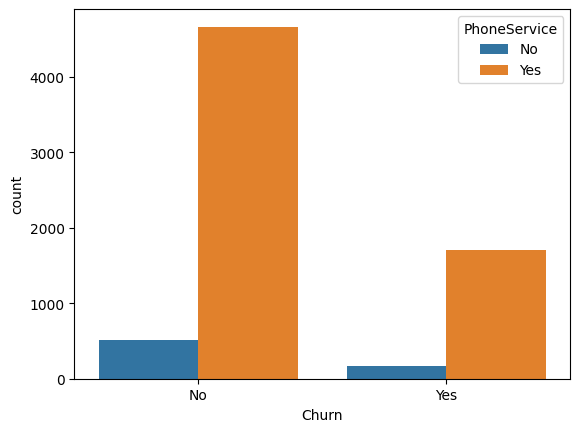

In [38]:
sns.countplot(x='Churn',data=df,hue='PhoneService')

**Churn Distribution w.r.t PaperlessBilling**

<Axes: xlabel='Churn', ylabel='count'>

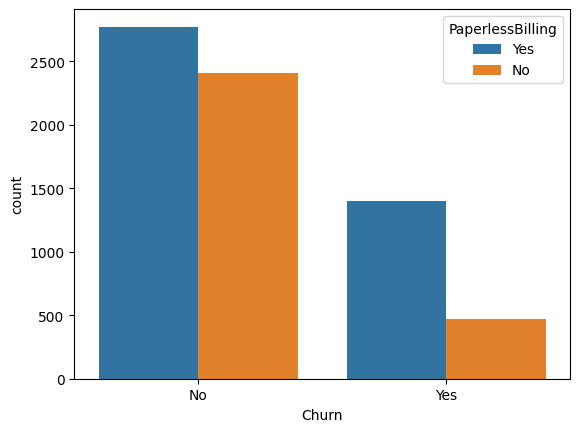

In [39]:
sns.countplot(x='Churn',data=df,hue='PaperlessBilling')

In [40]:
#Customers with Paperless Billing are most likely to churn.

**ChurnDistribution w.r.t TechSupport**

<Axes: xlabel='Churn', ylabel='count'>

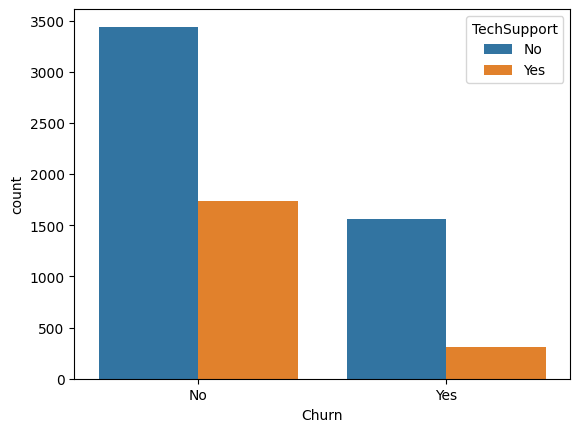

In [41]:
sns.countplot(x='Churn',data=df,hue='TechSupport')

In [42]:
##Customers with no TechSupport are most likely to migrate to another service provider.

**ChurnDistribution w.r.t Dependants**

<Axes: xlabel='Churn', ylabel='count'>

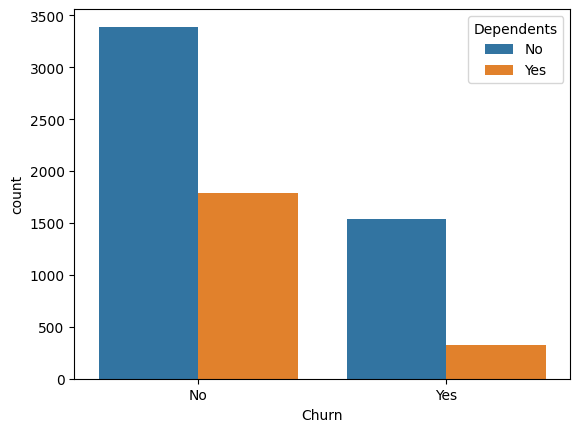

In [43]:
sns.countplot(x='Churn',data=df,hue='Dependents')

In [44]:
#Customers without dependents are more likely to churn.

**Exploring Numerical columns**

<Axes: xlabel='tenure', ylabel='Count'>

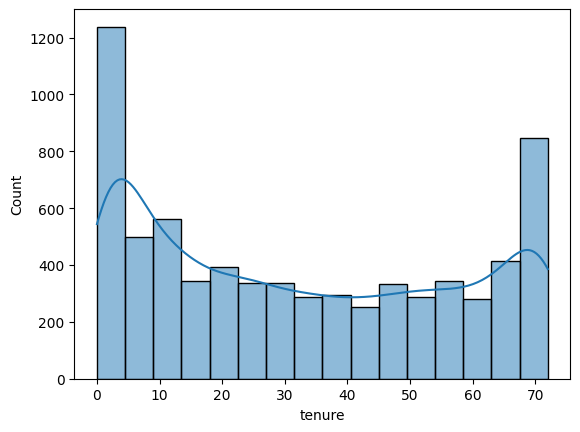

In [45]:
sns.histplot(x = df['tenure'],kde = True)


In [46]:
#Most of the customers are staying only in between 0-5 months in the company.

<Axes: xlabel='MonthlyCharges', ylabel='Count'>

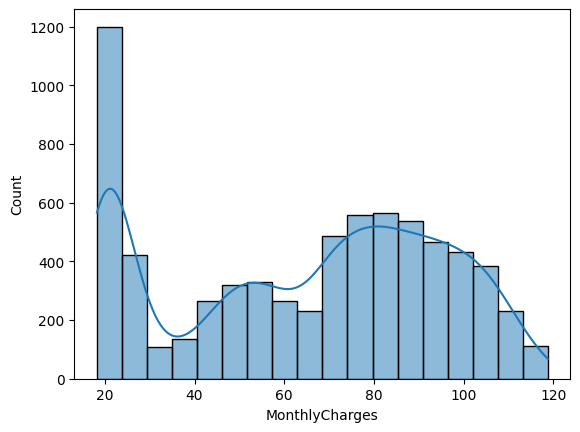

In [47]:
sns.histplot(x=df['MonthlyCharges'],kde=True)

In [48]:
#Most of the customers having Monthly charges in between 20-25.

**Association between Monthly Charges and TotalCharges**

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

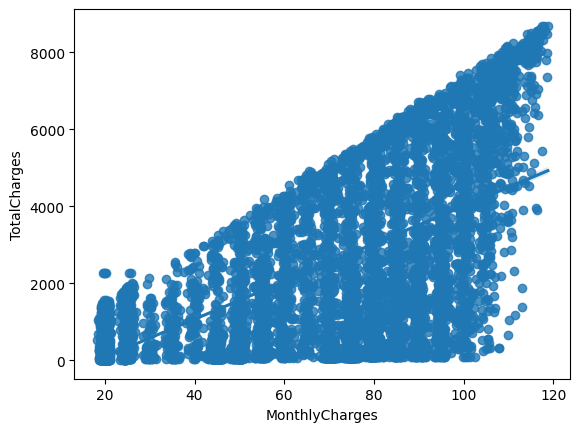

In [49]:
sns.regplot(x=df['MonthlyCharges'],y=df['TotalCharges'])

In [50]:
# When Monthly charges increase,Total charges also increase.

**DataPreProcessing**

In [51]:
#converting non-numeric type to numeric type
cols=['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod','Churn']
le=LabelEncoder()
for i in cols:
  df[i]=le.fit_transform(df[i])

In [52]:
df.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [53]:
#Finding correlation between  independant variable and dependant variable
df.corr()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.008414,-0.000863,-0.017021,-0.013773,-0.002105,-0.009212,-0.008393,-0.010487,0.000126,-0.011754,0.017352,-0.014569,0.000048,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.142948,-0.032310,-0.038653,0.066572,0.059428,-0.060625,0.105378,0.120176,-0.142554,0.156530,-0.038551,0.220173,0.102395,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142057,0.000891,0.143106,0.141498,0.153786,0.119999,0.124666,0.117412,0.294806,-0.014877,-0.154798,0.096848,0.318812,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024526,0.044590,0.080972,0.023671,0.013963,0.063268,-0.016558,-0.039741,0.243187,-0.111377,-0.040292,-0.113890,0.064535,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.331941,-0.030359,0.327203,0.360277,0.360653,0.324221,0.279756,0.286111,0.671607,0.006152,-0.370436,0.247900,0.824757,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,0.279690,0.387436,-0.092893,-0.052312,-0.071227,-0.096340,-0.022574,-0.032959,0.002247,0.016505,-0.004184,0.247398,0.112851,0.011942
MultipleLines,-0.008414,0.142948,0.142057,-0.024526,0.331941,0.279690,1.000000,0.011124,0.098108,0.202237,0.201137,0.100571,0.257152,0.258751,0.107114,0.163530,-0.171026,0.490434,0.468689,0.040102
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,0.011124,1.000000,-0.393013,-0.314737,-0.306805,-0.389382,-0.242532,-0.250343,0.099721,-0.138625,0.086140,-0.323260,-0.175429,-0.047291
OnlineSecurity,-0.017021,-0.038653,0.143106,0.080972,0.327203,-0.092893,0.098108,-0.393013,1.000000,0.283832,0.275438,0.354931,0.176207,0.187398,0.245530,-0.003636,-0.150100,0.296594,0.412245,-0.171226
OnlineBackup,-0.013773,0.066572,0.141498,0.023671,0.360277,-0.052312,0.202237,-0.314737,0.283832,1.000000,0.303546,0.294233,0.282106,0.274501,0.155085,0.126735,-0.170898,0.441780,0.509692,-0.082255


<Axes: >

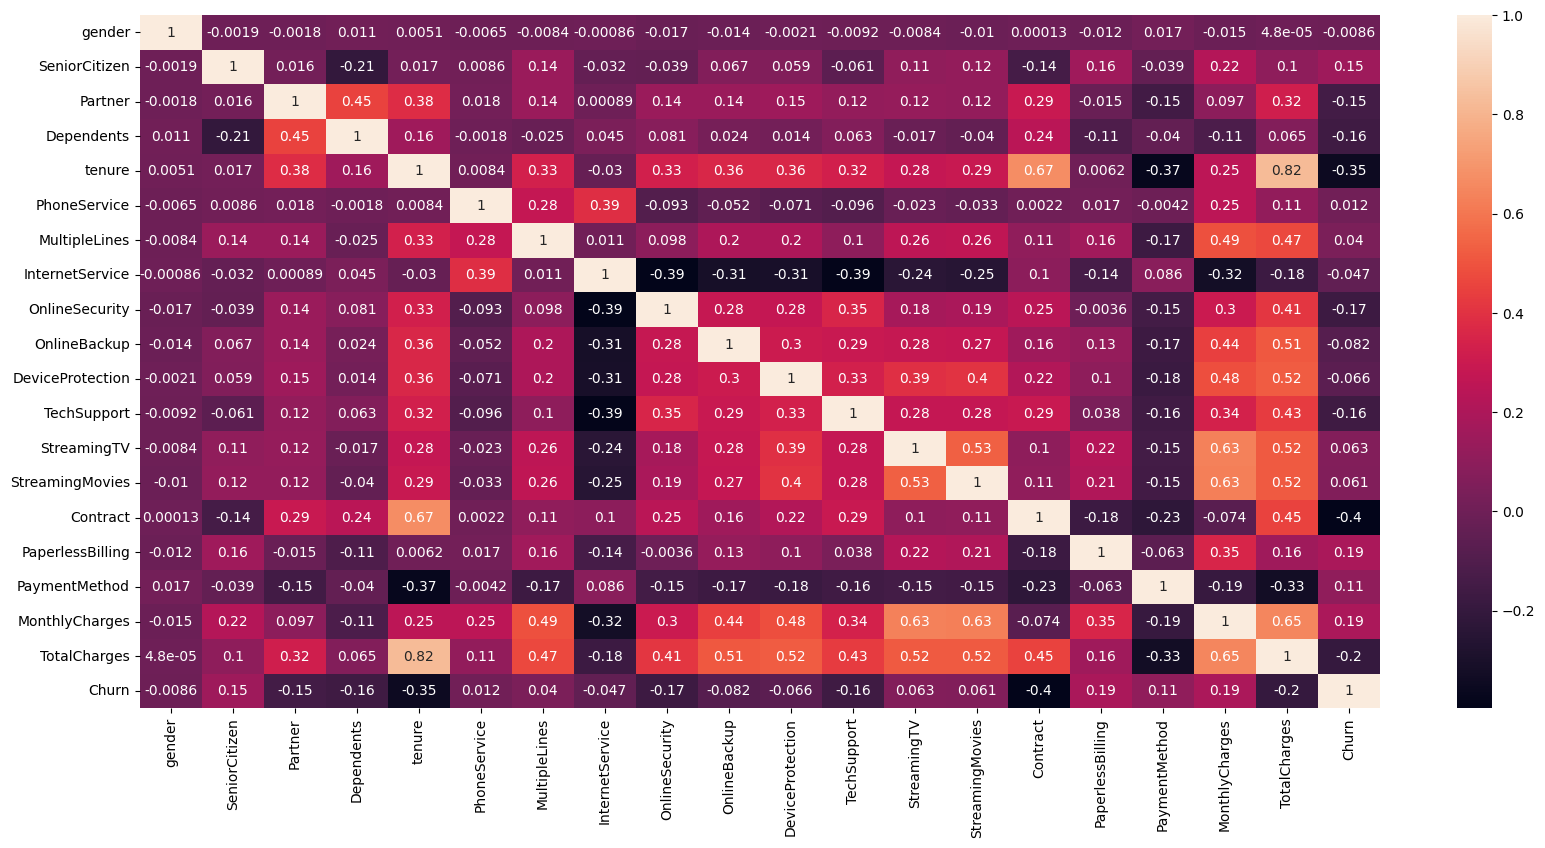

In [54]:
plt.figure(figsize=(20, 9))
sns.heatmap(df.corr(),annot =True)

In [55]:
#Splitting the DataSet
X=df.iloc[:,:-1]
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,0,0,1,0,1,1,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,0,1,0,1,1,1,1,1,1,3,84.80,1990.50
7039,0,0,1,1,72,1,1,1,0,1,1,0,1,1,1,1,1,103.20,7362.90
7040,0,0,1,1,11,0,0,0,1,0,0,0,0,0,0,1,2,29.60,346.45
7041,1,1,1,0,4,1,1,1,0,0,0,0,0,0,0,1,3,74.40,306.60


In [56]:
y=df.iloc[:,-1]
y


0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

**Normalising Dataset**

In [57]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
X=mms.fit_transform(X)
X

array([[0.        , 0.        , 1.        , ..., 0.66666667, 0.11542289,
        0.0012751 ],
       [1.        , 0.        , 0.        , ..., 1.        , 0.38507463,
        0.21586661],
       [1.        , 0.        , 0.        , ..., 1.        , 0.35422886,
        0.01031041],
       ...,
       [0.        , 0.        , 1.        , ..., 0.66666667, 0.11293532,
        0.03780868],
       [1.        , 1.        , 1.        , ..., 1.        , 0.55870647,
        0.03321025],
       [1.        , 0.        , 0.        , ..., 0.        , 0.86965174,
        0.78764136]])

**Train_Test_Split**

In [58]:
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.30,random_state=1)

**MODEL EVALUATIONS AND PREDICTIONS**

In [59]:
knn=KNeighborsClassifier()
sv=SVC()
gnb=GaussianNB()
dtc=DecisionTreeClassifier()
rf=RandomForestClassifier()
gbc=GradientBoostingClassifier()
abc=AdaBoostClassifier()
models=[knn,sv,gnb,dtc,rf,gbc,abc]
Accuracy_without_sampling=[]
for model in models:
  print("**************",model,"**********")
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print(classification_report(y_test,y_pred))
  accuracy=accuracy_score(y_test,y_pred)*100
  Accuracy_without_sampling.append(accuracy)

************** KNeighborsClassifier() **********
              precision    recall  f1-score   support

           0       0.84      0.83      0.83      1585
           1       0.51      0.53      0.52       528

    accuracy                           0.75      2113
   macro avg       0.67      0.68      0.68      2113
weighted avg       0.76      0.75      0.76      2113

************** SVC() **********
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1585
           1       0.64      0.52      0.57       528

    accuracy                           0.81      2113
   macro avg       0.75      0.71      0.72      2113
weighted avg       0.80      0.81      0.80      2113

************** GaussianNB() **********
              precision    recall  f1-score   support

           0       0.90      0.77      0.83      1585
           1       0.52      0.76      0.62       528

    accuracy                           0.77      2113
   macro

**ACCURACY TABLE**

In [60]:
Accuracy_without_sample=pd.DataFrame({"Algorithm":["KNeighborsClassifier","SVC","GaussianNB","DecisionTreeClassifier","RandomForestClassifier","GradientBoostingClassifier","AdaBoostClassifier"],"Accuracy_with0ut_sampling":Accuracy_without_sampling})
Accuracy_without_sample

,Algorithm,Accuracy_with0ut_sampling
0,KNeighborsClassifier,75.437766
1,SVC,80.785613
2,GaussianNB,76.573592
3,DecisionTreeClassifier,73.686701
4,RandomForestClassifier,80.927591
5,GradientBoostingClassifier,81.164221
6,AdaBoostClassifier,80.596309


**OverSampling**

In [61]:
from imblearn.over_sampling import SMOTE
os=SMOTE(random_state=1)
X_os,y_os=os.fit_resample(X,y)

In [62]:
y_os.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

In [63]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_os,y_os,test_size=0.3,random_state=1)

**Model Evaluations and Predictions**

In [64]:
knn_os=KNeighborsClassifier()
sv_os=SVC()
gnb_os=GaussianNB()
dtc_os=DecisionTreeClassifier()
rf_os=RandomForestClassifier()
gbc_os=GradientBoostingClassifier()
abc_os=AdaBoostClassifier()

models=[knn_os,sv_os,gnb_os,dtc_os,rf_os,gbc_os,abc_os]
Accuracy_with_oversampling=[]
for model in models:
  print("**************",model,"**********")
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print(classification_report(y_test,y_pred))
  accuracy=accuracy_score(y_test,y_pred)*100
  Accuracy_with_oversampling.append(accuracy)




************** KNeighborsClassifier() **********
              precision    recall  f1-score   support

           0       0.87      0.63      0.73      1582
           1       0.70      0.90      0.79      1523

    accuracy                           0.76      3105
   macro avg       0.79      0.77      0.76      3105
weighted avg       0.79      0.76      0.76      3105

************** SVC() **********
              precision    recall  f1-score   support

           0       0.83      0.75      0.79      1582
           1       0.76      0.84      0.80      1523

    accuracy                           0.79      3105
   macro avg       0.80      0.79      0.79      3105
weighted avg       0.80      0.79      0.79      3105

************** GaussianNB() **********
              precision    recall  f1-score   support

           0       0.81      0.69      0.74      1582
           1       0.72      0.83      0.77      1523

    accuracy                           0.76      3105
   macro

**ACCURACY TABLE**

In [65]:
accuracy_os_sample=pd.DataFrame({"Algorithm":["KNeighborsClassifier","SVC","GaussianNB","DecisionTreeClassifier","RandomForestClassifier","GradientBoostingClassifier","AdaBoostClassifier"],"Accuracy_with_oversampling":Accuracy_with_oversampling})
accuracy_os_sample

,Algorithm,Accuracy_with_oversampling
0,KNeighborsClassifier,76.392915
1,SVC,79.323671
2,GaussianNB,75.716586
3,DecisionTreeClassifier,78.904992
4,RandomForestClassifier,84.508857
5,GradientBoostingClassifier,83.510467
6,AdaBoostClassifier,81.384863


**UNDER SAMPLING**

In [66]:
from imblearn.under_sampling import RandomUnderSampler
us=RandomUnderSampler()
X_us,y_us=us.fit_resample(X,y)


In [67]:
y_us.value_counts()

0    1869
1    1869
Name: Churn, dtype: int64

In [68]:
X_train,X_test,y_train,y_test=train_test_split(X_us,y_us,test_size=0.3,random_state=1)

**MODEL EVALUATIONS AND PREDICTIONS**

In [69]:
knn_us=KNeighborsClassifier()
sv_us=SVC()
gnb_us=GaussianNB()
dtc_us=DecisionTreeClassifier()
rf_us=RandomForestClassifier()
gbc_us=GradientBoostingClassifier()
abc_us=AdaBoostClassifier()
models=[knn_us,sv_us,gnb_us,dtc_us,rf_us,gbc_us,abc_us]
Accuracy_with_undersampling=[]
for model in models:
  print("**************",model,"**********")
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print(classification_report(y_test,y_pred))
  accuracy=accuracy_score(y_test,y_pred)*100
  Accuracy_with_undersampling.append(accuracy)

************** KNeighborsClassifier() **********
              precision    recall  f1-score   support

           0       0.77      0.64      0.70       586
           1       0.67      0.79      0.72       536

    accuracy                           0.71      1122
   macro avg       0.72      0.72      0.71      1122
weighted avg       0.72      0.71      0.71      1122

************** SVC() **********
              precision    recall  f1-score   support

           0       0.79      0.72      0.75       586
           1       0.72      0.79      0.75       536

    accuracy                           0.75      1122
   macro avg       0.76      0.75      0.75      1122
weighted avg       0.76      0.75      0.75      1122

************** GaussianNB() **********
              precision    recall  f1-score   support

           0       0.80      0.69      0.74       586
           1       0.71      0.82      0.76       536

    accuracy                           0.75      1122
   macro

**ACCURACY TABLE**

In [70]:
accuracy_us_sample=pd.DataFrame({"Algorithm":["KNeighborsClassifier","SVC","GaussianNB","DecisionTreeClassifier","RandomForestClassifier","GradientBoostingClassifier","AdaBoostClassifier"],"Accuracy_with_undersampling":Accuracy_with_undersampling})
accuracy_us_sample

,Algorithm,Accuracy_with_undersampling
0,KNeighborsClassifier,71.301248
1,SVC,75.311943
2,GaussianNB,75.133690
3,DecisionTreeClassifier,69.251337
4,RandomForestClassifier,74.688057
5,GradientBoostingClassifier,77.807487
6,AdaBoostClassifier,77.183601


**SMOTEENN**

In [71]:
from imblearn.combine import SMOTEENN
smnn=SMOTEENN()
X_smo,y_smo=smnn.fit_resample(X,y)
X_train,X_test,y_train,y_test=train_test_split(X_smo,y_smo,test_size=.3,random_state=1)

In [72]:
knn_smnn = KNeighborsClassifier()
sv_smnn=SVC()
nb_smnn = GaussianNB()
de_smnn= DecisionTreeClassifier()
ad_smnn= AdaBoostClassifier()
gb_smnn= GradientBoostingClassifier()
rf_smnn= RandomForestClassifier()

In [73]:
models=[knn_smnn,sv_smnn,nb_smnn,de_smnn,rf_smnn,gb_smnn,ad_smnn]
accuracy_smoteenn = []

In [74]:
for model in models:
  print("**************",model,"**********")
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print(classification_report(y_test,y_pred))
  accuracy=accuracy_score(y_test,y_pred)*100
  accuracy_smoteenn.append(accuracy)

************** KNeighborsClassifier() **********
              precision    recall  f1-score   support

           0       0.98      0.89      0.93       827
           1       0.92      0.99      0.95      1031

    accuracy                           0.94      1858
   macro avg       0.95      0.94      0.94      1858
weighted avg       0.95      0.94      0.94      1858

************** SVC() **********
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       827
           1       0.93      0.96      0.95      1031

    accuracy                           0.94      1858
   macro avg       0.94      0.94      0.94      1858
weighted avg       0.94      0.94      0.94      1858

************** GaussianNB() **********
              precision    recall  f1-score   support

           0       0.88      0.89      0.88       827
           1       0.91      0.90      0.90      1031

    accuracy                           0.90      1858
   macro

**ACCURACY TABLE**

In [75]:
Accuracy_Smoteenn=pd.DataFrame({"Algorithm":["KNeighborsClassifier","SVC","GaussianNB","DecisionTreeClassifier","RandomForestClassifier","GradientBoostingClassifier","AdaBoostClassifier"],"Accuracy_smoteenn":accuracy_smoteenn})
Accuracy_Smoteenn

,Algorithm,Accuracy_smoteenn
0,KNeighborsClassifier,94.348762
1,SVC,93.918192
2,GaussianNB,89.504844
3,DecisionTreeClassifier,92.088267
4,RandomForestClassifier,95.263724
5,GradientBoostingClassifier,94.402583
6,AdaBoostClassifier,92.626480


**HyperParameterTuning**

In [106]:
#KNN
from sklearn.model_selection import GridSearchCV
params={'n_neighbors':[3,5,7,9],'weights':['uniform','distance'],'algorithm':['auto','ball_tree','kd_tree','brute']}
clf=GridSearchCV(knn_smnn,params,cv=5,scoring='accuracy')
clf.fit(X_train,y_train)
print(clf.best_params_)

{'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'distance'}


In [107]:
knn=KNeighborsClassifier(algorithm = 'auto', n_neighbors = 3, weights = 'distance')
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
y_pred

array([1, 0, 1, ..., 0, 1, 1])

In [108]:
print(accuracy_score(y_test,y_pred)*100)
print(classification_report(y_test,y_pred))

96.34015069967707
              precision    recall  f1-score   support

           0       0.99      0.93      0.96       827
           1       0.94      0.99      0.97      1031

    accuracy                           0.96      1858
   macro avg       0.97      0.96      0.96      1858
weighted avg       0.96      0.96      0.96      1858



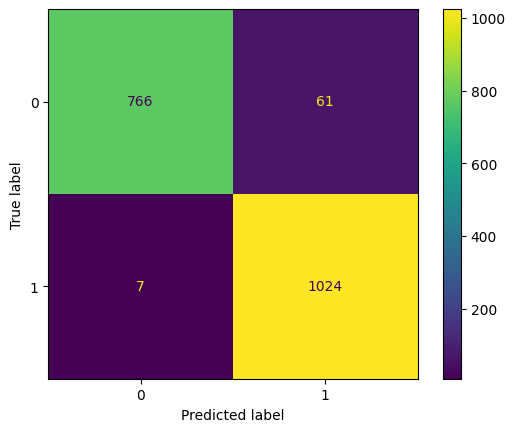

In [109]:
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

In [80]:
#SVC

parameter={'gamma':['scale','auto'],'C':[0.1,1,10,100]}
clf=GridSearchCV(sv_smnn,parameter,cv=5,scoring='accuracy')
clf.fit(X_train,y_train)
print(clf.best_params_)


{'C': 100, 'gamma': 'scale'}


In [81]:
svm=SVC(gamma='scale',C=100)
svm.fit(X_train,y_train)
y_pred=svm.predict(X_test)
y_pred

array([1, 0, 1, ..., 0, 1, 1])

In [82]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95       827
           1       0.95      0.98      0.97      1031

    accuracy                           0.96      1858
   macro avg       0.96      0.96      0.96      1858
weighted avg       0.96      0.96      0.96      1858



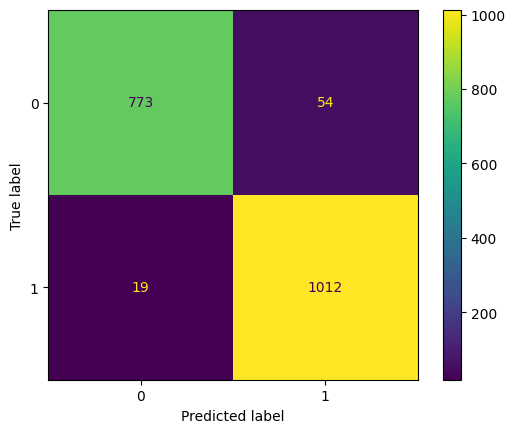

In [83]:
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

In [84]:
#Decision Tree Classifier
de_smnn=DecisionTreeClassifier(random_state=1)
param1={'splitter':['best','random'],'criterion':['entropy','gini','log_loss'],'max_depth':[8,9,10]}
clf=GridSearchCV(de_smnn,param1,cv=5,scoring='accuracy')
clf.fit(X_train,y_train)
print(clf.best_params_)

{'criterion': 'entropy', 'max_depth': 10, 'splitter': 'random'}


In [98]:
dtc=DecisionTreeClassifier(criterion='entropy',splitter='random',max_depth=10)
dtc.fit(X_train,y_train)
y_pred=dtc.predict(X_test)
y_pred

array([1, 0, 1, ..., 0, 1, 1])

In [99]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92       827
           1       0.93      0.95      0.94      1031

    accuracy                           0.93      1858
   macro avg       0.93      0.93      0.93      1858
weighted avg       0.93      0.93      0.93      1858



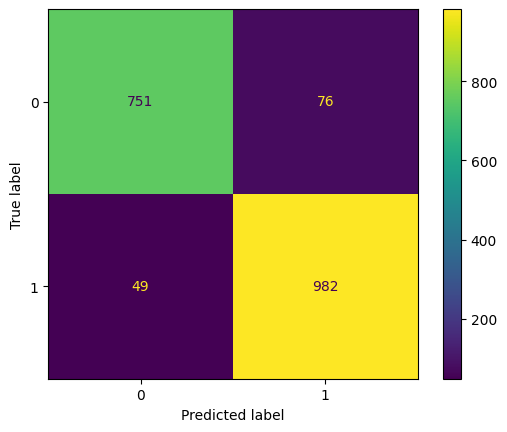

In [100]:
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

In [88]:
#Random Forest
rf_smnn=RandomForestClassifier(random_state=1)
param2={'n_estimators':[150,200,250,300],'criterion':['gini','entropy','logloss'],'max_depth':[None,5,10],'max_features':['auto','sqrt']}
clf=GridSearchCV(rf_smnn,param2,cv=5,scoring='accuracy')
clf.fit(X_train,y_train)
print(clf.best_params_)

{'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'n_estimators': 250}


In [101]:
rf=RandomForestClassifier(criterion='gini',n_estimators= 250,max_depth=None,max_features='auto')
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
y_pred

array([1, 0, 1, ..., 0, 1, 1])

In [102]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95       827
           1       0.94      0.97      0.96      1031

    accuracy                           0.95      1858
   macro avg       0.95      0.95      0.95      1858
weighted avg       0.95      0.95      0.95      1858



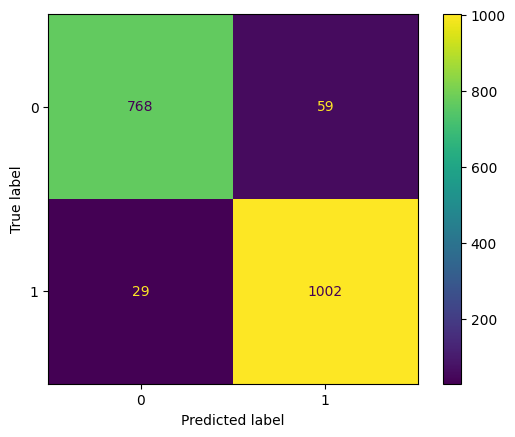

In [103]:
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

In [92]:
#GradientBoosting
from sklearn.ensemble import GradientBoostingClassifier
param4={'n_estimators': [80, 90, 100, 110, 115, 120],
                   'max_depth': [ 5,6,7,8],
                   'min_samples_split': [2, 3, 4, 5]}
clf=GridSearchCV(gb_smnn,param4,cv=5,scoring='accuracy')
clf.fit(X_train,y_train)
print(clf.best_params_)


{'max_depth': 5, 'min_samples_split': 3, 'n_estimators': 110}


In [104]:
gbc=GradientBoostingClassifier(max_depth = 5,min_samples_split= 3,n_estimators= 110)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=5, min_samples_split=3, n_estimators=110)

In [105]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95       827
           1       0.94      0.97      0.96      1031

    accuracy                           0.95      1858
   macro avg       0.95      0.95      0.95      1858
weighted avg       0.95      0.95      0.95      1858



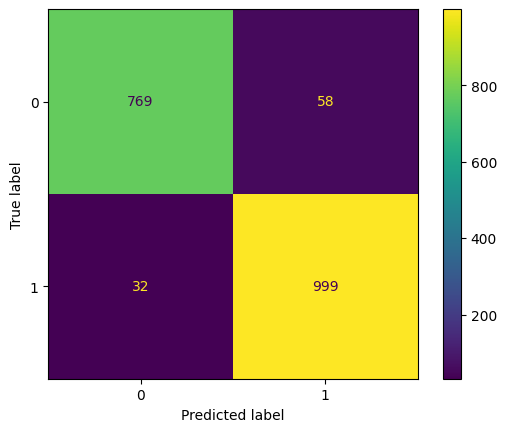

In [95]:
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

In [96]:
accuracy_table=pd.DataFrame({"Algorithm":["KNeighborsClassifier","SVC","GaussianNB","DecisionTreeClassifier","RandomForestClassifier","GradientBoostingClassifier","AdaBoostClassifier"],"Accuracy_without_sampling":Accuracy_without_sampling,"Accuracy_with_oversampling":Accuracy_with_oversampling,"Accuracy_with_undersampling":Accuracy_with_undersampling,"Accuracy_Smoteenn":accuracy_smoteenn})
accuracy_table

,Algorithm,Accuracy_without_sampling,Accuracy_with_oversampling,Accuracy_with_undersampling,Accuracy_Smoteenn
0,KNeighborsClassifier,75.437766,76.392915,71.301248,94.348762
1,SVC,80.785613,79.323671,75.311943,93.918192
2,GaussianNB,76.573592,75.716586,75.133690,89.504844
3,DecisionTreeClassifier,73.686701,78.904992,69.251337,92.088267
4,RandomForestClassifier,80.927591,84.508857,74.688057,95.263724
5,GradientBoostingClassifier,81.164221,83.510467,77.807487,94.402583
6,AdaBoostClassifier,80.596309,81.384863,77.183601,92.626480


In [97]:
#Using Smoteenn metthod, accuracy increased in all the models. After hyperparameter tuning method, I got 96% increase in  accuracy for KNearestNeighbors Classifier.I can conclude that KNearestNeighbors Classifer is the best model for customer churn prediction.